In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Кластеризация K-means

k-means один из алгоритмов вероятностного подхода

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=3, random_state=100)

Функция для создания учебного датасета 

(признаки рыб обитающих в озере)

In [20]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
                            [6, 9],
                            [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                     columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [21]:
train = make_data(10, 42)
test = make_data(10, 27)

Text(0.5, 1.0, 'Train')

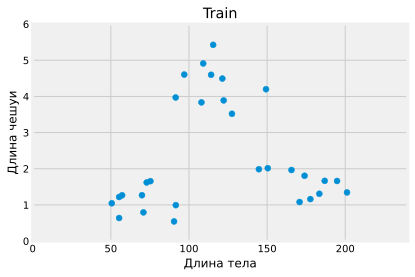

In [23]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

Нормализация данных

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns = ['x', 'y'])

Text(0.5, 1.0, 'train')

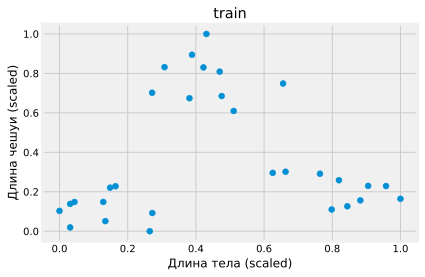

In [27]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('Длина тела (scaled)')
plt.ylabel('Длина чешуи (scaled)')
plt.title('train')

In [28]:
train_labels = model.fit_predict(train_scaled)

In [29]:
train_labels

array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1])

Центры кластеров

In [30]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

In [32]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

Text(0.5, 1.0, 'Train')

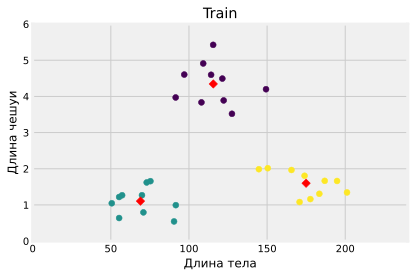

In [33]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

Inertia

Величина, показывающая, на сколько далеко в среднем расположены точки от центров своих кластеров

(сумма квадратов расстояний от объектов до центров их кластеров)

Чем она меньше, тем лучше разбиение на кластеры, но нужно соблюдать баланс между её значением и количеством кластеров.

Равна нулю, если кластеров столько же, сколько и объектов

In [34]:
model.inertia_

0.5417377477488047

In [35]:
inertia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

2.900264163209546
0.5417377477488047
0.4281736891174851
0.3258659915567972
0.2673616619363767
0.20725794455977645
0.16774172223409062
0.14671272476076846


Text(0.5, 1.0, 'Ínertia')

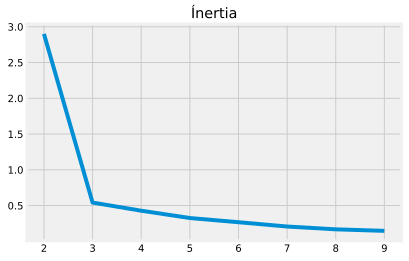

In [36]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('Ínertia')

Отнесение примеров из тестового датасета к определенному кластеру

In [37]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [38]:
test_labels = model.predict(test_scaled)

In [39]:
test_labels

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2])

Text(0.5, 1.0, 'Test')

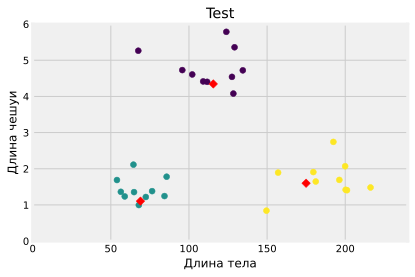

In [40]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')

### AgglomerativeClustering

Агломеративные алгоритмы - алгоритмы иерархического подхода, основанные на 

на объединении мелких кластеров в более крупные.

Вначале каждый объект считается отдельным кластером.

Другие алгоритмы иерархического подхода - дивизивные - используют обратный порядок,

когда сначала вся выборка считаетс одним кластером, и затем этот кластер делится на более мелкие

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
model = AgglomerativeClustering(n_clusters=3)

In [44]:
train_labels = model.fit_predict(train_scaled)

In [45]:
train_labels

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1], dtype=int64)

Text(0.5, 1.0, 'Train')

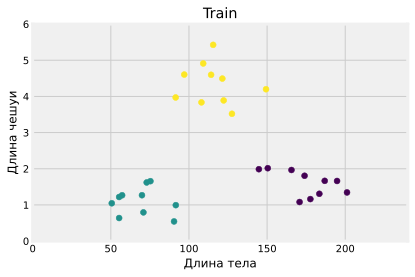

In [46]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier()

In [50]:
test_labels = knn.predict(test_scaled)

In [51]:
test_labels

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0], dtype=int64)

Text(0.5, 1.0, 'Test')

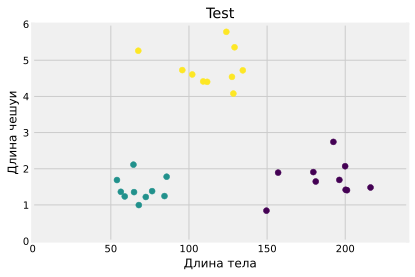

In [52]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')